<a href="https://colab.research.google.com/github/nickluto/AI-ML/blob/main/NLP_Project_Nick_Lutostanski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships. As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously. One of the most effective strategies at your disposal is to harness the power of Support Ticket Categorization.


### Objective

Develop an advanced support ticket categorization system that accurately classifies incoming tickets, assigns relevant tags based on their content, implements mechanisms and generate the first response based on the sentiment for prioritizing tickets for prompt resolution.


## **Sample of Expected Output**

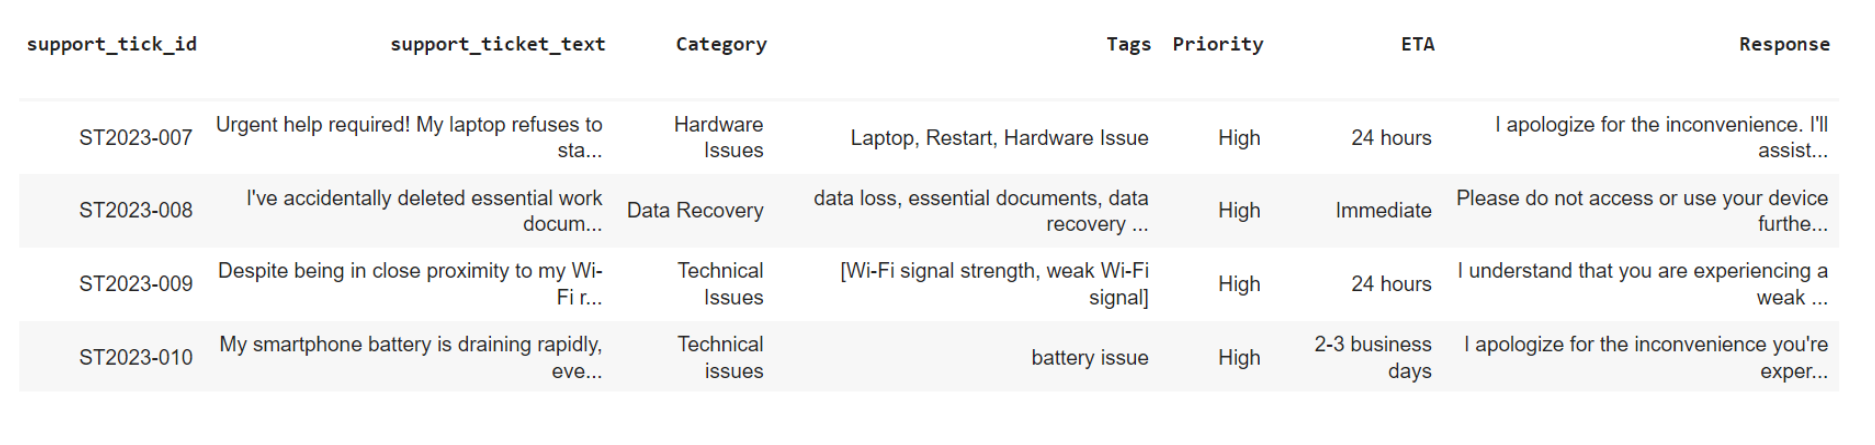

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

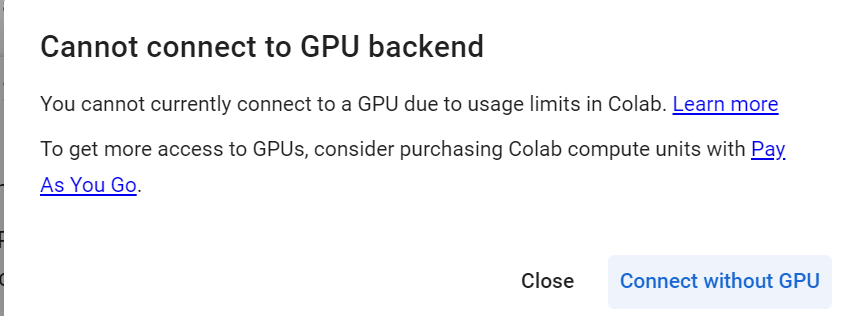

## **Installing and Importing Necessary Libraries and Dependencies**

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used

#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

In [2]:
# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used

!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 306.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 222.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+c

**Note** : There may be an error related to a dependency issue thrown by the pip package. This can be ignored as it will not impact the execution of the code.

In [3]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 pandas==1.5.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 84.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
transformers 4.41.2 requires huggingface-hub<1.0,>=0.23.0, but you have huggingface-hub 0.20.3 which is incompatible.


In [4]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# for loading and manipulating data
import pandas as pd

# for time computations
import time

## **Loading the Data**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Complete the code to read the CSV file.
data = pd.read_csv("/content/drive/MyDrive/Support_ticket_text_data_mid_term.csv")

## **Data Overview**

### Checking the first 5 rows of the data

In [7]:
# Complete the code to check the first 5 rows of the data
data.head()

support_tick_id                                support_ticket_text
0      ST2023-006  My internet connection has significantly slowe...
1      ST2023-007  Urgent help required! My laptop refuses to sta...
2      ST2023-008  I've accidentally deleted essential work docum...
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...
4      ST2023-010  My smartphone battery is draining rapidly, eve...

### Checking the shape of the data

In [8]:
# Complete the code to check the shape of the data
data.shape

(21, 2)

### Checking the missing values in the data

In [9]:
# prompt: check data for missing values

data.isnull().sum()


support_tick_id        0
support_ticket_text    0
dtype: int64

In [10]:
# Complete the code to check for missing values in the data


## **Model Building**

### Loading the model

In [11]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [12]:
model_path = hf_hub_download(
    repo_id=model_name_or_path, # Complete the code to mention the repo_id
    filename=model_basename  # Complete the code to mention the filename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [13]:
# uncomment and run the following code in case GPU is being used

#llm = Llama(
   #  model_path=model_path,
 #    n_ctx=1024, # Context window
# )

In [14]:
# uncomment and run the following code in case GPU is not being used

llm = Llama(
    model_path=model_path,
    n_ctx=1024, # Context window
   # n_cores=-2# Number of CPU cores to use
 )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Utility functions

In [15]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## **Task 1: Ticket Categorization and Returning Structured Output**

In [16]:
# creating a copy of the data
data_1 = data.copy()

In [17]:
#Defining the response funciton for Task 1.
def response_1(prompt,ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      A:
      """,
      max_tokens=1000, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [18]:
prompt_1 = """
    Given a support ticket text, categorize it into one of the following categories:
  1. Data Recovery
  2. Technical Issues
  3. Hardware Issues
  4. Other

  Format the output as a JSON object shown below:
   {"Category": "category"}
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [19]:
start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1, x))
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [20]:
print("Time taken ",(end-start))

Time taken  183.54920291900635


In [21]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_1.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                     model_response  
0  {"Category": "Technical Issues"}  
1   {"Category": "Hardware Issues"}  
2     {"Category": "Data Recovery"}  
3  {"Category": "Technical Issues"}  
4   {"Category": "Hardware Issues"}

In [22]:
i = 2
print(data_1.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [23]:
print(data_1.loc[i, 'model_response'])

{"Category": "Data Recovery"}


In [24]:
# applying the function to the model response
data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head()

0    {'Category': 'Technical Issues'}
1     {'Category': 'Hardware Issues'}
2       {'Category': 'Data Recovery'}
3    {'Category': 'Technical Issues'}
4     {'Category': 'Hardware Issues'}
Name: model_response_parsed, dtype: object

In [25]:
data_1['model_response_parsed'].value_counts()

{'Category': 'Data Recovery'}                      7
{'Category': 'Technical Issues'}                   6
{'Category': 'Hardware Issues'}                    6
{'Category': 'Other'}                              1
{'Category': 'Data Recovery, Technical Issues'}    1
Name: model_response_parsed, dtype: int64

In [26]:
# Normalizing the model_response_parsed column
model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head()

Category
0  Technical Issues
1   Hardware Issues
2     Data Recovery
3  Technical Issues
4   Hardware Issues

In [27]:
# Concatinating two dataframes
data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                     model_response             model_response_parsed  \
0  {"Category": "Technical Issues"}  {'Category': 'Technical Issues'}   
1   {"Category": "Hardware Issues"}   {'Category': 'Hardware Issues'}   
2     {"Category": "Data Recovery"}     {'Category': 'Data Recovery'}   
3  {"Category": "Technical Issues"}  {'Category': 'Technical Issues'}   
4   {"Category": "Hardware Issues"}   {'Category': 'Hardware Issues'}   

           Category  
0  Technical Issues  
1   Hardware Issues  
2     Data Recovery  
3  Technical Issues  
4   Hardware Issues

In [28]:
# Dropping model_response and model_response_parsed columns
final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           Category  
0  Technical Issues  
1   Hardware Issues  
2     Data Recovery  
3  Technical Issues  
4   Hardware Issues

## **Task 2: Creating Tags**

In [29]:
# creating a copy of the data
data_2 = data.copy()

In [30]:
def response_2(prompt,ticket,category):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      A:
      """,
      max_tokens=1000, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0.1, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [36]:
prompt_2 = """
  Generate relevant tags for support tickets based on their text content and category.
Format the output as a JSON object as shown below:
  {"Tags": "tags"}
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [37]:
start = time.time()
data_2["model_response"]=final_data_1[['support_ticket_text','Category']].apply(lambda x: response_2(prompt_2, x[0],x[1]),axis =1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [38]:
print("Time taken ",end-start)

Time taken  238.4019477367401


In [39]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_2.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      model_response  
0  {"Tags": ["Internet Connection", "Slow Speed",...  
1  {"Tags": ["Urgent", "Laptop Startup Issue", "H...  
2  {"Tags": ["Data Loss", "Document Deletion", "D...  
3  {"Tags": ["Wi-Fi signal", "Weak signal", "Trou...  
4  {"Tags": ["Battery Drain", "Smartphone", "Hard...

In [40]:
i = 2
print(data_2.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [41]:
print(data_2.loc[i, 'model_response'])

{"Tags": ["Data Loss", "Document Deletion", "Data Recovery"]}


In [42]:
# Applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)

In [43]:
data_2["model_response_parsed"]

0     {'Tags': ['Internet Connection', 'Slow Speed',...
1     {'Tags': ['Urgent', 'Laptop Startup Issue', 'H...
2     {'Tags': ['Data Loss', 'Document Deletion', 'D...
3     {'Tags': ['Wi-Fi signal', 'Weak signal', 'Trou...
4     {'Tags': ['Battery Drain', 'Smartphone', 'Hard...
5     {'Tags': ['Account Access', 'Password Reset', ...
6     {'Tags': ['Performance issues', 'Computer opti...
7     {'Tags': ['Blue Screen Error', 'Crashing', 'Ha...
8     {'Tags': ['External Hard Drive', 'Data Recover...
9     {'Tags': ['Graphics Card Malfunction', 'Gaming...
10    {'Tags': ['USB drive', 'Data loss', 'File reco...
11    {'Tags': ['computer malfunction', 'screen issu...
12    {'Tags': ['Water Damage', 'Laptop Repair', 'Da...
13       {'Tags': ['Physical Damage', 'Data Recovery']}
14    {'Tags': ['touchpad', 'laptop', 'hardware', 'i...
15    {'Tags': ['Internet Connection', 'Dropouts', '...
16    {'Tags': ['Wi-Fi', 'Connectivity issues', 'Inc...
17     {'Tags': ['accidental_format', 'data_reco

In [44]:
# Normalizing the model_response_parsed column
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

Tags
0  [Internet Connection, Slow Speed, Disconnectio...
1  [Urgent, Laptop Startup Issue, Hardware Malfun...
2      [Data Loss, Document Deletion, Data Recovery]
3       [Wi-Fi signal, Weak signal, Troubleshooting]
4              [Battery Drain, Smartphone, Hardware]

In [45]:
# Concatinating two dataframes
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      model_response  \
0  {"Tags": ["Internet Connection", "Slow Speed",...   
1  {"Tags": ["Urgent", "Laptop Startup Issue", "H...   
2  {"Tags": ["Data Loss", "Document Deletion", "D...   
3  {"Tags": ["Wi-Fi signal", "Weak signal", "Trou...   
4  {"Tags": ["Battery Drain", "Smartphone", "Hard...   

                               model_response_parsed  \
0  {'Tags': ['Internet Connection', 'Slow Speed',...   
1  {'Tags': ['Urgent', 'Laptop Startup Issue', 'H...   
2  {'Tags': ['Data Loss', 'Document Deletion', 'D...   
3  {'Tags': ['Wi-Fi signal', 'Weak signal', 'Trou...   
4  {'Tags': ['Battery Drain', 'Smartphone', 'Hard...   

                                                Tags  
0  [Internet Connection, Slow Speed, Disconnectio...  
1  [Urgent, Laptop Startup Issue, Hardware Malfun...  
2      [Data Loss, Document Deletion, Data Recovery]  
3       [Wi-Fi signal, Weak signal, Troubleshooting]  
4              [Battery Drain, Smartphone, Hardware]

In [46]:
# Dropping model_response and model_response_parsed columns
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                                Tags  
0  [Internet Connection, Slow Speed, Disconnectio...  
1  [Urgent, Laptop Startup Issue, Hardware Malfun...  
2      [Data Loss, Document Deletion, Data Recovery]  
3       [Wi-Fi signal, Weak signal, Troubleshooting]  
4              [Battery Drain, Smartphone, Hardware]

In [47]:
# Checking the value counts of Category column
final_data_2['Tags'].value_counts()

[Internet Connection, Slow Speed, Disconnection, Work From Home]                            1
[Urgent, Laptop Startup Issue, Hardware Malfunction]                                        1
[Data Loss, Document Deletion, Data Recovery]                                               1
[Wi-Fi signal, Weak signal, Troubleshooting]                                                1
[Battery Drain, Smartphone, Hardware]                                                       1
[Account Access, Password Reset, Urgent]                                                    1
[Performance issues, Computer optimization, Productivity]                                   1
[Blue Screen Error, Crashing, Hardware Issue]                                               1
[External Hard Drive, Data Recovery, Not Recognized]                                        1
[Graphics Card Malfunction, Gaming Performance Issue, Hardware Diagnosis]                   1
[USB drive, Data loss, File recovery]                       

In [48]:
final_data_2 = pd.concat([final_data_2,final_data_1["Category"]],axis=1)

In [49]:
final_data_2 = final_data_2[["support_tick_id","support_ticket_text","Category","Tags"]]
final_data_2

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

                           Category  \
0                  Technical Issues   
1                   Hardware Issues   
2                     Data Recovery   
3                  Technical Issues   
4                   Hardware Issues   
5                             Other   
6                  Technical Issues   
7                   Hardware Issues   
8                     Data Recovery   
9                   Hardware Issues   
10                    Data Recovery   
11                  Hardware Issues   
12                    Data Recovery   
13                    Data Recovery   
14                  Hardware Issues   
15                 Technical Issues   
16                 Technical Issues   
17                    Data Recovery   
18                    Data Recovery   
19                 Technical Issues   
20  Data Recovery, Technical Issues   

                                                 Tags  
0   [Internet Connection, Slow Speed, Disconnectio...  
1   [Urgent, Laptop Startup Issue, Hardware Malfun...  
2       [Data Loss, Document Deletion, Data Recovery]  
3        [Wi-Fi signal, Weak signal, Troubleshooting]  
4               [Battery Drain, Smartphone, Hardware]  
5            [Account Access, Password Reset, Urgent]  
6   [Performance issues, Computer optimization, Pr...  
7       [Blue Screen Error, Crashing, Hardware Issue]  
8   [External Hard Drive, Data Recovery, Not Recog...  
9   [Graphics Card Malfunction, Gaming Performance...  
10              [USB drive, Data loss, File recovery]  
11  [computer malfunction, screen issue, hardware ...  
12       [Water Damage, Laptop Repair, Data Recovery]  
13                   [Physical Damage, Data Recovery]  
14                [touchpad, laptop, hardware, issue]  
15  [Internet Connection, Dropouts, Technical Issu...  
16  [Wi-Fi, Connectivity issues, Inconsistent conn...  
17                 [accidental_format, data_recovery]  
18               [External Hard Drive, Data Recovery]  
19  [Internet Connection, Slow Speed, Disconnectio...  
20  [Software issues, Unusual behavior, Data loss,...

## **Task 3: Assigning Priority and ETA**

In [50]:
# creating a copy of the data
data_3 = data.copy()

In [51]:
def response_3(prompt,ticket,category,tags):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      Tags: {tags}
      A:
      """,
      max_tokens=1000,  #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=0.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [52]:
prompt_3 = """
       Generate Priority for support tickets based on their text content and category and tags. Use low, medium, or high as priority classes and in a separate column create an ETA for when the ticket will be resolved.
  Format the output as a JSON object as shown below:
  {"Priority": "priority"}
"""

**Note**: The output of the model should be in a structured format (JSON format).

In [53]:
# Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_3['model_response'] = final_data_2[['support_ticket_text','Category','Tags']].apply(lambda x: response_3(prompt_3, x[0],x[1],x[2]),axis=1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [54]:
print("Time taken ",(end-start))

Time taken  264.48311734199524


In [56]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_3.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                  model_response  
0  {"Priority": "high", "ETA": "Within 4 hours"}  
1  {"Priority": "high", "ETA": "Within 2 hours"}  
2  {"Priority": "high", "ETA": "Within 2 hours"}  
3  {"Priority": "high", "ETA": "Within 2 hours"}  
4  {"Priority": "high", "ETA": "Within 2 hours"}

In [57]:
i = 2
print(data_3.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [58]:
print(data_3.loc[i, 'model_response'])

{"Priority": "high", "ETA": "Within 2 hours"}


In [59]:
# Applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

0    {'Priority': 'high', 'ETA': 'Within 4 hours'}
1    {'Priority': 'high', 'ETA': 'Within 2 hours'}
2    {'Priority': 'high', 'ETA': 'Within 2 hours'}
3    {'Priority': 'high', 'ETA': 'Within 2 hours'}
4    {'Priority': 'high', 'ETA': 'Within 2 hours'}
Name: model_response_parsed, dtype: object

In [60]:
# Normalizing the model_response_parsed column
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head(21)

Priority              ETA
0      high   Within 4 hours
1      high   Within 2 hours
2      high   Within 2 hours
3      high   Within 2 hours
4      high   Within 2 hours
5      high           1 hour
6       NaN              NaN
7      high   Within 2 hours
8      high   Within 4 hours
9      high   Within 2 hours
10     high   Within 2 hours
11     high   within 2 hours
12     high  Within 24 hours
13      NaN              NaN
14     high   Within 2 hours
15     high          2 hours
16      NaN              NaN
17      NaN              NaN
18      NaN              NaN
19      NaN              NaN
20      NaN              NaN

In [61]:
# Concatinating two dataframes
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                  model_response  \
0  {"Priority": "high", "ETA": "Within 4 hours"}   
1  {"Priority": "high", "ETA": "Within 2 hours"}   
2  {"Priority": "high", "ETA": "Within 2 hours"}   
3  {"Priority": "high", "ETA": "Within 2 hours"}   
4  {"Priority": "high", "ETA": "Within 2 hours"}   

                           model_response_parsed Priority             ETA  
0  {'Priority': 'high', 'ETA': 'Within 4 hours'}     high  Within 4 hours  
1  {'Priority': 'high', 'ETA': 'Within 2 hours'}     high  Within 2 hours  
2  {'Priority': 'high', 'ETA': 'Within 2 hours'}     high  Within 2 hours  
3  {'Priority': 'high', 'ETA': 'Within 2 hours'}     high  Within 2 hours  
4  {'Priority': 'high', 'ETA': 'Within 2 hours'}     high  Within 2 hours

In [62]:
# Dropping model_response and model_response_parsed columns
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

support_tick_id                                support_ticket_text Priority  \
0      ST2023-006  My internet connection has significantly slowe...     high   
1      ST2023-007  Urgent help required! My laptop refuses to sta...     high   
2      ST2023-008  I've accidentally deleted essential work docum...     high   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...     high   
4      ST2023-010  My smartphone battery is draining rapidly, eve...     high   

              ETA  
0  Within 4 hours  
1  Within 2 hours  
2  Within 2 hours  
3  Within 2 hours  
4  Within 2 hours

In [63]:
final_data_3 = pd.concat([final_data_3,final_data_2[["Category","Tags"]]],axis=1)

In [64]:
final_data_3 = final_data_3[["support_tick_id","support_ticket_text","Category","Tags","Priority","ETA"]]

In [65]:
final_data_3

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

                           Category  \
0                  Technical Issues   
1                   Hardware Issues   
2                     Data Recovery   
3                  Technical Issues   
4                   Hardware Issues   
5                             Other   
6                  Technical Issues   
7                   Hardware Issues   
8                     Data Recovery   
9                   Hardware Issues   
10                    Data Recovery   
11                  Hardware Issues   
12                    Data Recovery   
13                    Data Recovery   
14                  Hardware Issues   
15                 Technical Issues   
16                 Technical Issues   
17                    Data Recovery   
18                    Data Recovery   
19                 Technical Issues   
20  Data Recovery, Technical Issues   

                                                 Tags Priority  \
0   [Internet Connection, Slow Speed, Disconnectio...     high   
1   [Urgent, Laptop Startup Issue, Hardware Malfun...     high   
2       [Data Loss, Document Deletion, Data Recovery]     high   
3        [Wi-Fi signal, Weak signal, Troubleshooting]     high   
4               [Battery Drain, Smartphone, Hardware]     high   
5            [Account Access, Password Reset, Urgent]     high   
6   [Performance issues, Computer optimization, Pr...      NaN   
7       [Blue Screen Error, Crashing, Hardware Issue]     high   
8   [External Hard Drive, Data Recovery, Not Recog...     high   
9   [Graphics Card Malfunction, Gaming Performance...     high   
10              [USB drive, Data loss, File recovery]     high   
11  [computer malfunction, screen issue, hardware ...     high   
12       [Water Damage, Laptop Repair, Data Recovery]     high   
13                   [Physical Damage, Data Recovery]      NaN   
14                [touchpad, laptop, hardware, issue]     high   
15  [Internet Connection, Dropouts, Technical Issu...     high   
16  [Wi-Fi, Connectivity issues, Inconsistent conn...      NaN   
17                 [accidental_format, data_recovery]      NaN   
18               [External Hard Drive, Data Recovery]      NaN   
19  [Internet Connection, Slow Speed, Disconnectio...      NaN   
20  [Software issues, Unusual behavior, Data loss,...      NaN   

                ETA  
0    Within 4 hours  
1    Within 2 hours  
2    Within 2 hour

## **Task 4 - Creating a Draft Response**

In [66]:
# creating a copy of the data
data_4 = data.copy()

In [67]:
def response_4(prompt,ticket,category,tags,priority,eta):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category : {category}
      Tags : {tags}
      Priority: {priority}
      ETA: {eta}
      A:
      """,
      max_tokens=1000, #Complete the code to set the maximum number of tokens the model should generate for this task.
      stop=["Q:", "\n"],
      temperature=.01, #Complete the code to set the value for temperature.
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]


    return temp_output

In [68]:
prompt_4 = """
    Generate an empathetic response to the customer's concerns for support based on their text content, category, tags, priority and ETA.
"""

**Note** : For this task, we will not be using the *`extract_json_data`* function. Hence, the output from the model should be a plain string and not a JSON object.

In [69]:
#Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_4['model_response'] = final_data_3[['support_ticket_text','Category','Tags','Priority','ETA']].apply(lambda x: response_4(prompt_4, x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [70]:
print("Time taken",(end-start))

Time taken 290.0991928577423


In [71]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_4.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           model_response  
0       Hello [Customer],  
1   Dear Valued Customer,  
2   Dear Valued Customer,  
3  Hello [Customer Name],  
4       Hello [Customer],

In [72]:
i = 2
print(data_4.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [73]:
print(data_4.loc[i, 'model_response'])

 Dear Valued Customer,


In [74]:
final_data_4 = pd.concat([final_data_3,data_4["model_response"]],axis=1)

In [75]:
final_data_4.rename(columns={"model_response":"Response"},inplace=True)

In [76]:
final_data_4

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

                           Category  \
0                  Technical Issues   
1                   Hardware Issues   
2                     Data Recovery   
3                  Technical Issues   
4                   Hardware Issues   
5                             Other   
6                  Technical Issues   
7                   Hardware Issues   
8                     Data Recovery   
9                   Hardware Issues   
10                    Data Recovery   
11                  Hardware Issues   
12                    Data Recovery   
13                    Data Recovery   
14                  Hardware Issues   
15                 Technical Issues   
16                 Technical Issues   
17                    Data Recovery   
18                    Data Recovery   
19                 Technical Issues   
20  Data Recovery, Technical Issues   

                                                 Tags Priority  \
0   [Internet Connection, Slow Speed, Disconnectio...     high   
1   [Urgent, Laptop Startup Issue, Hardware Malfun...     high   
2       [Data Loss, Document Deletion, Data Recovery]     high   
3        [Wi-Fi signal, Weak signal, Troubleshooting]     high   
4               [Battery Drain, Smartphone, Hardware]     high   
5            [Account Access, Password Reset, Urgent]     high   
6   [Performance issues, Computer optimization, Pr...      NaN   
7       [Blue Screen Error, Crashing, Hardware Issue]     high   
8   [External Hard Drive, Data Recovery, Not Recog...     high   
9   [Graphics Card Malfunction, Gaming Performance...     high   
10              [USB drive, Data loss, File recovery]     high   
11  [computer malfunction, screen issue, hardware ...     high   
12       [Water Damage, Laptop Repair, Data Recovery]     high   
13                   [Physical Damage, Data Recovery]      NaN   
14                [touchpad, laptop, hardware, issue]     high   
15  [Internet Connection, Dropouts, Technical Issu...     high   
16  [Wi-Fi, Connectivity issues, Inconsistent conn...      NaN   
17                 [accidental_format, data_recovery]      NaN   
18               [External Hard Drive, Data Recovery]      NaN   
19  [Internet Connection, Slow Speed, Disconnectio...      NaN   
20  [Software issues, Unusual behavior, Data loss,...      NaN   

                ETA                                           Response  
0    Within

## **Model Output Analysis**

In [77]:
# Creating a copy of the dataframe of task-4
final_data = final_data_4.copy()

In [78]:
final_data['Category'].value_counts()    # complete the code with the column name for the column containing ticket categories

Data Recovery                      7
Technical Issues                   6
Hardware Issues                    6
Other                              1
Data Recovery, Technical Issues    1
Name: Category, dtype: int64

In [79]:
final_data["Priority"].value_counts() # complete the code with the column name for the column containing the priorities of the ticket.

high    14
Name: Priority, dtype: int64

In [80]:
final_data["ETA"].value_counts()# complete the code with the column name for the column containing ticket resolution ETA.

Within 2 hours     8
Within 4 hours     2
1 hour             1
within 2 hours     1
Within 24 hours    1
2 hours            1
Name: ETA, dtype: int64

Let's dive in a bit deeper here.

In [81]:
final_data.groupby(['Category', 'ETA']).support_tick_id.count() # complete the code to group by based on the categories and ETA.

Category          ETA            
Data Recovery     Within 2 hours     2
                  Within 24 hours    1
                  Within 4 hours     1
Hardware Issues   Within 2 hours     5
                  within 2 hours     1
Other             1 hour             1
Technical Issues  2 hours            1
                  Within 2 hours     1
                  Within 4 hours     1
Name: support_tick_id, dtype: int64

## **Actionable Insights and Recommendations**

*# Customer data is very important insight for businesses. The ability to use NLP models to more quickly categorize this data, assign it a priority, and provide a quick ETA on when it will be fixed help keep customers aware of the status of their tickets will raise their level of satisfaction.
# New Section


<font size=6 color='blue'>Power Ahead</font>
___